# Galaxy Zoo CNN Classification

##### In this script, we will train a Convolution Neural Network to classify optical galaxy images into spiral and elliptical patterns. These images were taking from the original Galaxy Zoo project.
##### A Convolutional Neural Network consists of several multi-layer perceptrons. Its basic structure is given below:
![alt text](CNN.png "CNN")

The above chart is a typical example to show how the data flows in convolutional neural network. We have a convolutional layer, that identifies useful features from the image pixel values. This is followed by ReLU(Rectified Linear Unit) which is an activation function that converts all negative values into values between 0 and 1. The resultant images are called feature maps. Feature maps are usually then downsampled by maxpooling. This entire process generally forms one layer of a convolutional neural network. Usually several such layers are concanted to form a "Deep Convolutional Neural Network". Generally a fully-connected layer is added to the end of your last layer of cnn. This is followed by the final layer (also known as 'output layer') which has the number of your output classes. In the example given below this is two as it is a binary classification problem of spiral and elliptical galaxies.

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import optimizers
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##### First, we need to give the dimensions of the images, and give the path to the directories where the images are kept in. 
##### Total Training samples = 49,563
##### Total Validation samples = 12015

In [2]:
img_width, img_height = 200,200

train_data_dir = 'gxy_zoo/train'
validation_data_dir = 'gxy_zoo/validation'

nb_train_samples = 49563 
nb_validation_samples = 12015

# An epoch is a measure of the number of times all of the training vectors are used once to update the weights. For batch
# training all of the training samples pass through the learning algorithm simultaneously in one epoch before weights are 
# updated.

epochs = 10
batch_size = 500

##### First step is to visualise our data in order to identify if everything is as expected.

In [7]:
from IPython.display import Image, HTML, display
from glob import glob
imagesList=''.join( ["<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />" % str(s) 
                     for s in sorted(glob('gxy_zoo/train/Elliptical/272***.jpg')) ])
display(HTML(imagesList))

##### Now, we start building the model. We have used the sequential model in keras. Output of this snippet is a 3D feature map in the form: height, width and features

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

##### After these layers, we convert our 3D feature maps to 1D feature vectors ith the help of 'flatten'. We use 'dropout' layer to prevent overfitting.

In [ ]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# This is the augmentation configuration we will use for training:
train_datagen = ImageDataGenerator(
    rotation_range = 180,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# We use the 'rescaling' augmentation configuration for the testing batch, which  is a value by which we will multiply the
# data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be 
# too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling 
# with a 1/255. factor.
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

###### The Neural Network was trained for 15 epochs on two Nvidia TitanX Pascal GPUs. The whole training process took 5 hours. Weights of the final model is saved  as 'best_model.h5' . You would need Keras version 2.1.5 or later to read the best_model.h5 file. 

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)
# model.predict_generator(validation_generator, steps = nb_validation_samples // batch_size)
model.save_weights('best_model.h5')

# Now to test our model on a few images (608 images).

In [96]:
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import optimizers
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score 
from keras.utils.np_utils import to_categorical
import math

img_width, img_height = 200, 200
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

batch_size = 50
os.chdir('C:/Users/C5269612')

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model2.load_weights('best_model.h5')

test_datagen = ImageDataGenerator(rescale=1./255)

test_dir = 'gxy_zoo/test'

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

number_of_examples = len(test_generator.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * batch_size)) 
# 1.0 above is to skip integer division

test_labels = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(test_generator[i][1]))

print(len(test_labels))
predict = model2.predict_generator(test_generator,steps = number_of_generator_calls)
np.save('predictions.npy', predict)

Found 608 images belonging to 2 classes.
608


##### The following code gives the f score, the precision and the recall of the model. Of course, using a bigger test data set  would give a better understanding of the quality of the model.

In [97]:
test_labels = np.load('test_labels.npy')
predict = np.load('predictions.npy')
classified_results = np.rint(predict)
f_score = f1_score(test_labels, classified_results, average='binary')
precision_score = precision_score(test_labels, classified_results, average='binary')
recall_score = recall_score(test_labels, classified_results, average='binary')
print('F Score:', f_score, 'Precision:', precision_score, 'Recall:', recall_score)

F Score: 0.9036144578313252 Precision: 0.8287292817679558 Recall: 0.9933774834437086


##### The confusion matrix given below shows that the neural network in this example is very good at identifying spiral galaxies. It identifies 99% of all spiral galaxies and 80% of all elliptocal galaxies correctly.

Confusion matrix, without normalization
[[244  62]
 [  2 300]]
Normalized confusion matrix
[[0.8  0.2 ]
 [0.01 0.99]]


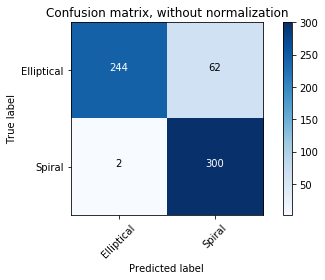

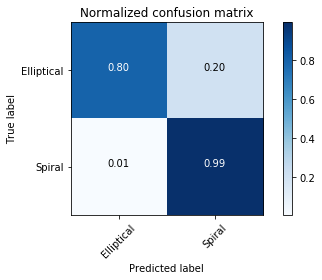

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names = ['Elliptical','Spiral']

cnf_matrix = confusion_matrix(test_labels, classified_results)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Suggestions to Improve the Model.
1. Increase the number of epochs
2. Shuffle the training and validation data during training instead of having a fixed training and valdiation dataset.
3. Use Transfer Learning which is a technique where you use the weights from a pre-trained neural network like 
VGG-16 or Inception-v3 and attach it to a simple cnn like the example shown above. One can then train 
only the last few layers of the simple cnn using back-propagation to get better results.